# Binary Classification Machine Learning

# Load the Dataset

In [114]:
 # Load libraries
 import numpy
 from matplotlib import pyplot
 from pandas import read_csv
 from pandas import set_option
 from pandas.plotting import scatter_matrix
 from sklearn.preprocessing import StandardScaler
 from sklearn.model_selection import train_test_split
 from sklearn.model_selection import KFold
 from sklearn.model_selection import cross_val_score
 from sklearn.model_selection import GridSearchCV
 from sklearn.metrics import classification_report
 from sklearn.metrics import confusion_matrix
 from sklearn.metrics import accuracy_score
 from sklearn.pipeline import Pipeline
 from sklearn.linear_model import LogisticRegression
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
 from sklearn.naive_bayes import GaussianNB
 from sklearn.svm import SVC
 from sklearn.ensemble import AdaBoostClassifier
 from sklearn.ensemble import GradientBoostingClassifier
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.ensemble import ExtraTreesClassifier

In [115]:
 # Load dataset
 url = 'sonar.csv'
 dataset = read_csv(url, header=None)

In [116]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [117]:
dataset.isnull().sum().any()

False

# Analyze Data

**Descriptive Statistics**

In [118]:
dataset.shape

(208, 61)

In [119]:
dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [120]:
dataset.head(20)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [121]:
import pandas as pd

In [122]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,...,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000
mean,0.0292,0.0384,0.0438,0.0539,0.0752,0.1046,0.1217,0.1348,0.1780,0.2083,...,0.0161,0.0134,0.0107,0.0109,0.0093,0.0082,0.0078,0.0079,0.0079,0.0065
std,0.0230,0.0330,0.0384,0.0465,0.0556,0.0591,0.0618,0.0852,0.1184,0.1344,...,0.0120,0.0096,0.0071,0.0073,0.0071,0.0057,0.0058,0.0065,0.0062,0.0050
min,0.0015,0.0006,0.0015,0.0058,0.0067,0.0102,0.0033,0.0055,0.0075,0.0113,...,0.0000,0.0008,0.0005,0.0010,0.0006,0.0004,0.0003,0.0003,0.0001,0.0006
25%,0.0134,0.0164,0.0190,0.0244,0.0381,0.0670,0.0809,0.0804,0.0970,0.1113,...,0.0084,0.0073,0.0051,0.0054,0.0042,0.0044,0.0037,0.0036,0.0037,0.0031
50%,0.0228,0.0308,0.0343,0.0440,0.0625,0.0922,0.1069,0.1121,0.1522,0.1824,...,0.0139,0.0114,0.0095,0.0093,0.0075,0.0069,0.0060,0.0058,0.0064,0.0053
75%,0.0355,0.0479,0.0580,0.0645,0.1003,0.1341,0.1540,0.1696,0.2334,0.2687,...,0.0208,0.0167,0.0149,0.0145,0.0121,0.0106,0.0104,0.0103,0.0103,0.0085
max,0.1371,0.2339,0.3059,0.4264,0.4010,0.3823,0.3729,0.4590,0.6828,0.7106,...,0.1004,0.0709,0.0390,0.0352,0.0447,0.0394,0.0355,0.0440,0.0364,0.0439


In [123]:
 pd.set_option('display.precision', 4)

In [124]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,...,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000
mean,0.0292,0.0384,0.0438,0.0539,0.0752,0.1046,0.1217,0.1348,0.1780,0.2083,...,0.0161,0.0134,0.0107,0.0109,0.0093,0.0082,0.0078,0.0079,0.0079,0.0065
std,0.0230,0.0330,0.0384,0.0465,0.0556,0.0591,0.0618,0.0852,0.1184,0.1344,...,0.0120,0.0096,0.0071,0.0073,0.0071,0.0057,0.0058,0.0065,0.0062,0.0050
min,0.0015,0.0006,0.0015,0.0058,0.0067,0.0102,0.0033,0.0055,0.0075,0.0113,...,0.0000,0.0008,0.0005,0.0010,0.0006,0.0004,0.0003,0.0003,0.0001,0.0006
25%,0.0134,0.0164,0.0190,0.0244,0.0381,0.0670,0.0809,0.0804,0.0970,0.1113,...,0.0084,0.0073,0.0051,0.0054,0.0042,0.0044,0.0037,0.0036,0.0037,0.0031
50%,0.0228,0.0308,0.0343,0.0440,0.0625,0.0922,0.1069,0.1121,0.1522,0.1824,...,0.0139,0.0114,0.0095,0.0093,0.0075,0.0069,0.0060,0.0058,0.0064,0.0053
75%,0.0355,0.0479,0.0580,0.0645,0.1003,0.1341,0.1540,0.1696,0.2334,0.2687,...,0.0208,0.0167,0.0149,0.0145,0.0121,0.0106,0.0104,0.0103,0.0103,0.0085
max,0.1371,0.2339,0.3059,0.4264,0.4010,0.3823,0.3729,0.4590,0.6828,0.7106,...,0.1004,0.0709,0.0390,0.0352,0.0447,0.0394,0.0355,0.0440,0.0364,0.0439


In [125]:
 # class distribution
 dataset.groupby(60).size()

60
M    111
R     97
dtype: int64

# Unimodal Data Visualizations

In [126]:
import matplotlib.pyplot as plt

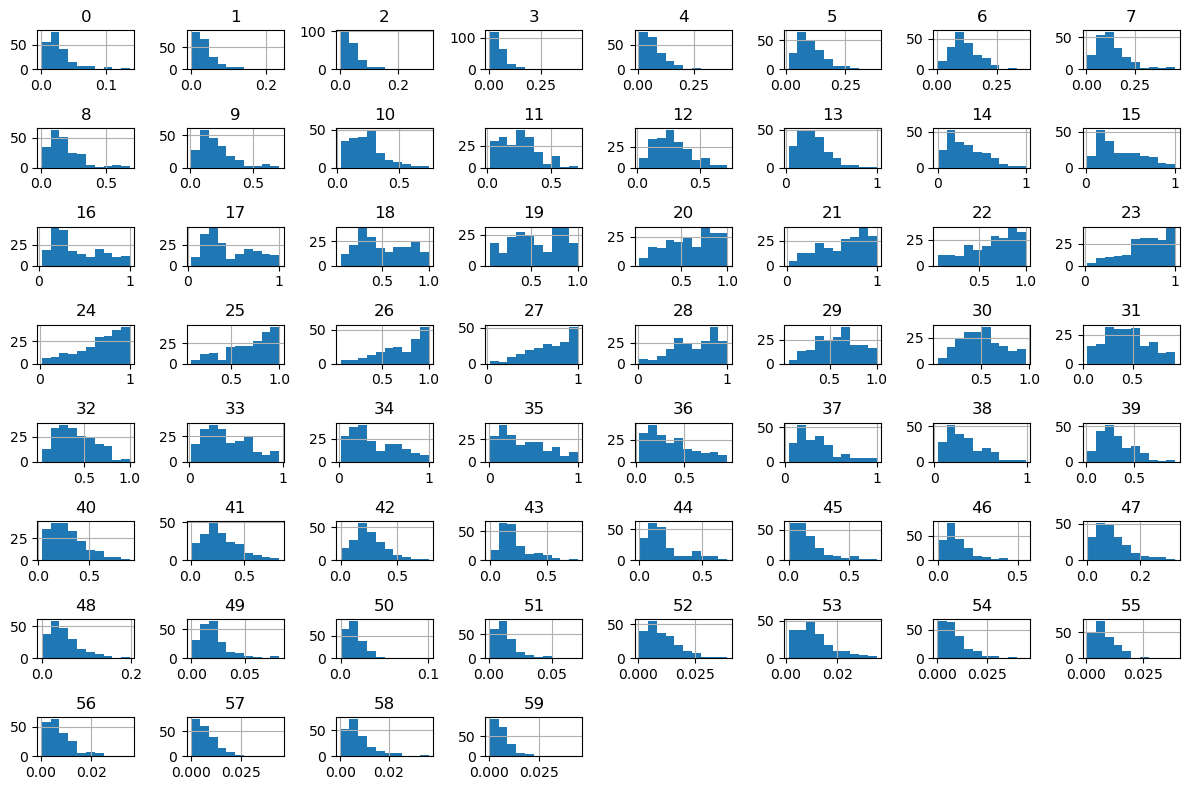

In [127]:
dataset.hist(sharex=False, sharey=False, xlabelsize=10, ylabelsize=10, figsize=(12, 8))
plt.tight_layout()  # Prevent overlapping of subplots
plt.show()

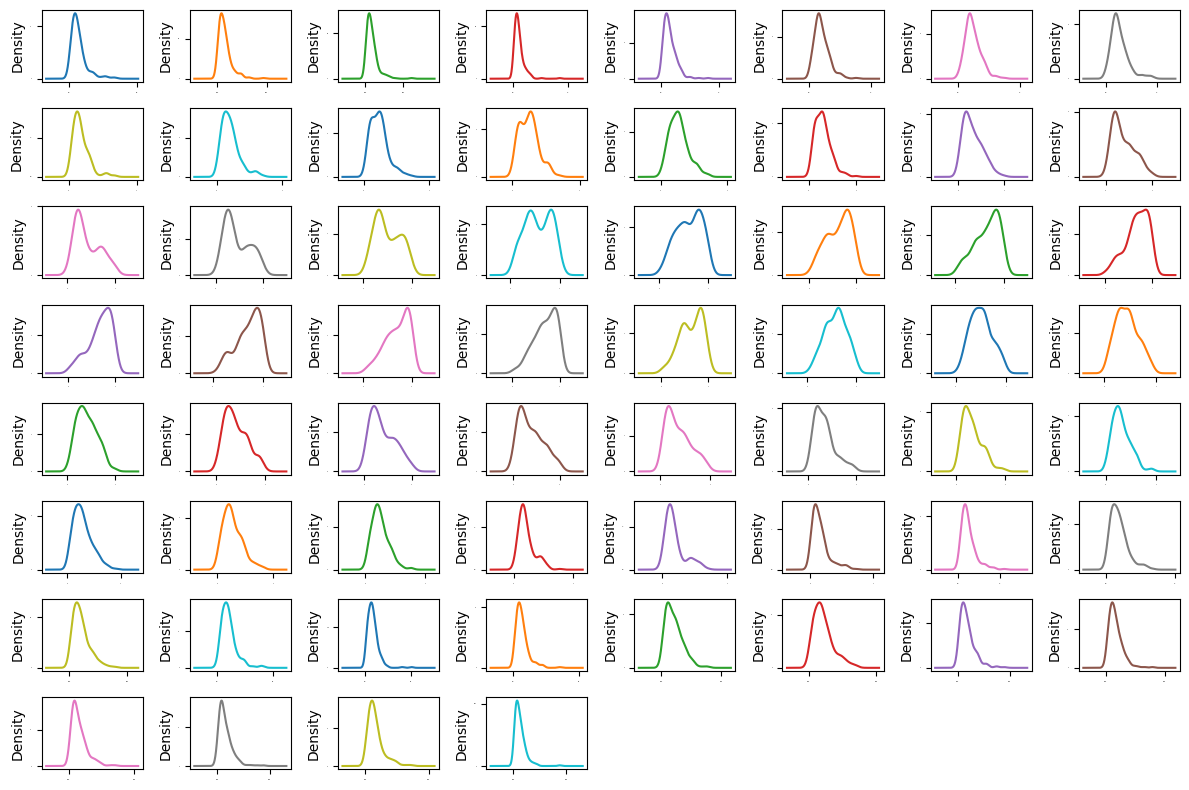

In [128]:
 # density
 dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False,fontsize=1,figsize=(12, 8))
 plt.tight_layout()
 pyplot.show()

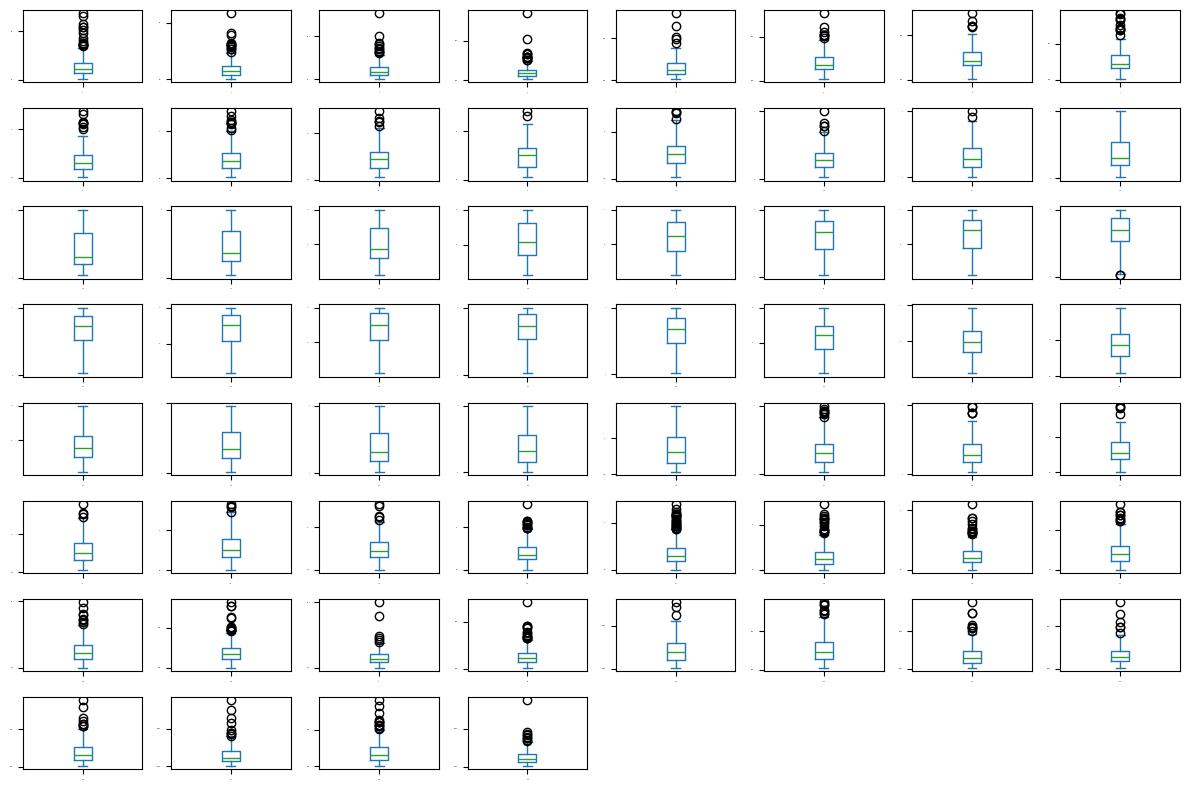

In [129]:
dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False,fontsize=1,figsize=(12, 8))
plt.tight_layout()
pyplot.show()

# Multimodal Data Visualizations

In [130]:
import seaborn as sns

In [131]:
numeric_data = dataset.select_dtypes(include=['number'])


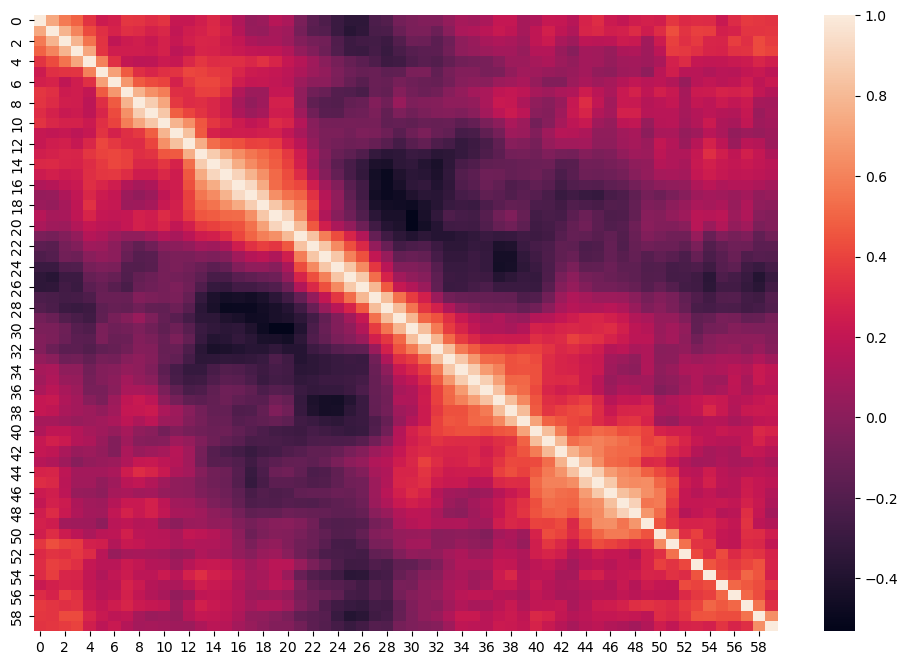

In [132]:
plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr())
plt.show()

# Validation Dataset

In [133]:
 # Split-out validation dataset
 array = dataset.values
 X = array[:,0:60].astype(float)
 Y = array[:,60]
 validation_size = 0.20
 X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size)

# Evaluate Algorithms: Baseline

In [134]:
 # Test options and evaluation metric
 num_folds = 10
 seed = 7
 scoring = 'accuracy'

In [135]:
 # Spot-Check Algorithms
 models = []
 models.append(('LR', LogisticRegression()))
 models.append(('LDA', LinearDiscriminantAnalysis()))
 models.append(('KNN', KNeighborsClassifier()))
 models.append(('CART', DecisionTreeClassifier()))
 models.append(('NB', GaussianNB()))
 models.append(('SVM', SVC()))

In [136]:
 results = []
 names = []
 for name, model in models:
      kfold = KFold(n_splits=num_folds)
      cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)

LR: 0.777574 (0.064653)
LDA: 0.720588 (0.126473)
KNN: 0.753676 (0.118631)
CART: 0.709191 (0.114319)
NB: 0.681250 (0.106288)
SVM: 0.765074 (0.078084)


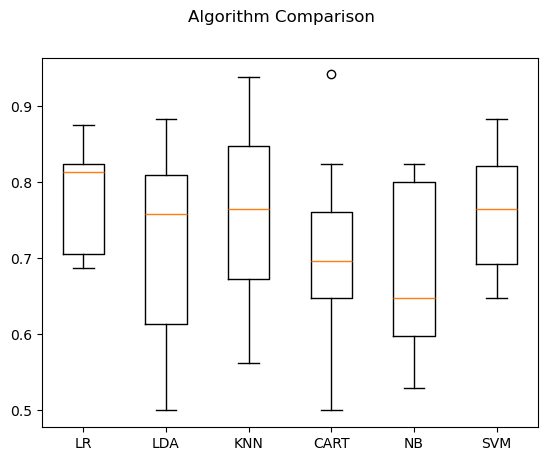

In [137]:
 # Compare Algorithms
 fig = pyplot.figure()
 fig.suptitle('Algorithm Comparison')
 ax = fig.add_subplot(111)
 pyplot.boxplot(results)
 ax.set_xticklabels(names)
 pyplot.show()

# Evaluate Algorithms: Standardize Data

In [138]:
 # Standardize the dataset
 pipelines = []
 pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
 pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))


In [139]:
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
     kfold = KFold(n_splits=num_folds)
     cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(msg)
    

ScaledLR: 0.728676 (0.066600)
ScaledLDA: 0.720588 (0.126473)
ScaledKNN: 0.800735 (0.095288)
ScaledCART: 0.709926 (0.117514)
ScaledNB: 0.681250 (0.106288)
ScaledSVM: 0.808088 (0.071833)


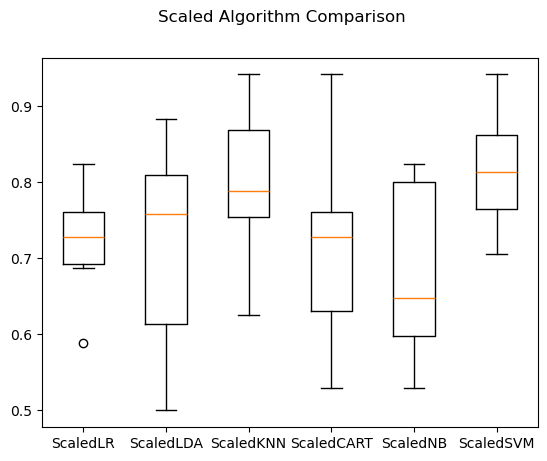

In [140]:
 # Compare Algorithms
 fig = pyplot.figure()
 fig.suptitle('Scaled Algorithm Comparison')
 ax = fig.add_subplot(111)
 pyplot.boxplot(results)
 ax.set_xticklabels(names)
 pyplot.show()

# Algorithm Tuning

**Tuning KNN**

In [141]:
 # Tune scaled KNN
 scaler = StandardScaler().fit(X_train)
 rescaledX = scaler.transform(X_train)
 neighbors = [1,3,5,7,9,11,13,15,17,19,21]
 param_grid = dict(n_neighbors=neighbors)
 model = KNeighborsClassifier()
 kfold = KFold(n_splits=num_folds)
 grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
 grid_result = grid.fit(rescaledX, Y_train)
 print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
 means = grid_result.cv_results_['mean_test_score']
 stds = grid_result.cv_results_['std_test_score']
 params = grid_result.cv_results_['params']
 for mean, stdev, param in zip(means, stds, params):
     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.831618 using {'n_neighbors': 1}
0.831618 (0.074239) with: {'n_neighbors': 1}
0.788603 (0.078288) with: {'n_neighbors': 3}
0.806618 (0.094696) with: {'n_neighbors': 5}
0.776471 (0.094161) with: {'n_neighbors': 7}
0.752574 (0.068958) with: {'n_neighbors': 9}
0.764338 (0.074196) with: {'n_neighbors': 11}
0.733456 (0.072011) with: {'n_neighbors': 13}
0.727574 (0.084885) with: {'n_neighbors': 15}
0.715074 (0.082196) with: {'n_neighbors': 17}
0.703309 (0.087266) with: {'n_neighbors': 19}
0.709559 (0.091010) with: {'n_neighbors': 21}


# Tuning SVM

In [142]:
 # Tune scaled SVM
 scaler = StandardScaler().fit(X_train)
 rescaledX = scaler.transform(X_train)
 c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
 kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
 param_grid = dict(C=c_values, kernel=kernel_values)
 model = SVC()
 kfold = KFold(n_splits=num_folds)
 grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
 grid_result = grid.fit(rescaledX, Y_train)
 print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
 means = grid_result.cv_results_['mean_test_score']
 stds = grid_result.cv_results_['std_test_score']
 params = grid_result.cv_results_['params']
 for mean, stdev, param in zip(means, stds, params):
     print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.820221 using {'C': 1.7, 'kernel': 'rbf'}
0.734559 (0.071909) with: {'C': 0.1, 'kernel': 'linear'}
0.560662 (0.104042) with: {'C': 0.1, 'kernel': 'poly'}
0.572794 (0.130240) with: {'C': 0.1, 'kernel': 'rbf'}
0.692279 (0.113150) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.728309 (0.050609) with: {'C': 0.3, 'kernel': 'linear'}
0.644118 (0.134870) with: {'C': 0.3, 'kernel': 'poly'}
0.777574 (0.059059) with: {'C': 0.3, 'kernel': 'rbf'}
0.747059 (0.080309) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.746324 (0.047766) with: {'C': 0.5, 'kernel': 'linear'}
0.710294 (0.130696) with: {'C': 0.5, 'kernel': 'poly'}
0.777941 (0.050575) with: {'C': 0.5, 'kernel': 'rbf'}
0.740441 (0.079265) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.740441 (0.061325) with: {'C': 0.7, 'kernel': 'linear'}
0.752941 (0.114878) with: {'C': 0.7, 'kernel': 'poly'}
0.795956 (0.051530) with: {'C': 0.7, 'kernel': 'rbf'}
0.716176 (0.057635) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.727941 (0.069562) with: {'C': 0.9, 'kernel': 'linear'

#  Ensemble Methods

In [143]:
import warnings
warnings.filterwarnings('ignore')

In [144]:
 # ensembles
 ensembles = []
 ensembles.append(('AB', AdaBoostClassifier()))
 ensembles.append(('GBM', GradientBoostingClassifier()))
 ensembles.append(('RF', RandomForestClassifier()))
 ensembles.append(('ET', ExtraTreesClassifier()))
 results = []
 names = []
 for name, model in ensembles:
      kfold = KFold(n_splits=num_folds)
      cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)

AB: 0.699265 (0.115874)
GBM: 0.789706 (0.095952)
RF: 0.818750 (0.062023)
ET: 0.837132 (0.071062)


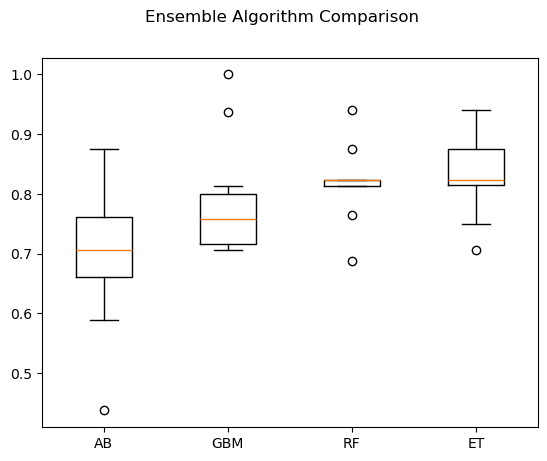

In [145]:
 # Compare Algorithms
 fig = pyplot.figure()
 fig.suptitle('Ensemble Algorithm Comparison')
 ax = fig.add_subplot(111)
 pyplot.boxplot(results)
 ax.set_xticklabels(names)
 pyplot.show()

#  Finalize Model

 The SVM showed the most promise as a low complexity and stable model for this problem. In
 this section we will nalize the model by training it on the entire training dataset and make
 predictions for the hold-out validation dataset to con rm our ndings. A part of the ndings was
 that SVM performs better when the dataset is standardized so that all attributes have a mean
 value of zero and a standard deviation of one. We can calculate this from the entire training
 dataset and apply the same transform to the input attributes from the validation dataset.

In [146]:

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load a sample dataset (Iris dataset as an example)

X = array[:,0:60].astype(float)
Y = array[:,60]

# Split the data into training and validation sets (validation size = 20%)
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)

# Initialize the SVM classifier with specified parameters
svm_model = SVC(C=1.7, kernel='rbf')

# Set up 10-fold cross-validation
kfold = StratifiedKFold(n_splits=10)

# Perform cross-validation on the training data
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring='accuracy')

# Train the SVM model on the full training set
svm_model.fit(X_train, y_train)

# Validate the model on the validation set
y_val_pred = svm_model.predict(X_val)

# Evaluate performance
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report (Validation):\n", classification_report(y_val, y_val_pred))



Cross-Validation Accuracy Scores: [0.82352941 0.64705882 0.88235294 0.76470588 0.94117647 0.88235294
 0.6875     0.875      0.875      0.875     ]
Mean CV Accuracy: 0.8253676470588236
Validation Accuracy: 0.8571428571428571

Classification Report (Validation):
               precision    recall  f1-score   support

           M       0.85      0.92      0.88        25
           R       0.87      0.76      0.81        17

    accuracy                           0.86        42
   macro avg       0.86      0.84      0.85        42
weighted avg       0.86      0.86      0.86        42

